In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.style.use('ggplot')

# Reading File

In [2]:
df = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
df.head().round(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.47,Two-Door Car,Medsize
3,WW63253,California,7645.86,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.88,SUV,Medsize
4,HB64268,Washington,2813.69,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.13,Four-Door Car,Medsize


# Dealing with data

In [3]:
# Show DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
# Describe DataFrame
df.describe(include="all").round(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.00,9134,9134,9134,9134,9134,9134,9134.00,...,9134.00,9134.00,9134.00,9134,9134,9134,9134,9134.00,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.94,NaN,NaN,NaN,NaN,NaN,NaN,37657.38,...,48.06,0.38,2.97,NaN,NaN,NaN,NaN,434.09,NaN,NaN
std,NaN,NaN,6870.97,NaN,NaN,NaN,NaN,NaN,NaN,30379.90,...,27.91,0.91,2.39,NaN,NaN,NaN,NaN,290.50,NaN,NaN
min,NaN,NaN,1898.01,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,0.00,0.00,1.00,NaN,NaN,NaN,NaN,0.10,NaN,NaN
25%,NaN,NaN,3994.25,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,24.00,0.00,1.00,NaN,NaN,NaN,NaN,272.26,NaN,NaN
50%,NaN,NaN,5780.18,NaN,NaN,NaN,NaN,NaN,NaN,33889.50,...,48.00,0.00,2.00,NaN,NaN,NaN,NaN,383.95,NaN,NaN
75%,NaN,NaN,8962.17,NaN,NaN,NaN,NaN,NaN,NaN,62320.00,...,71.00,0.00,4.00,NaN,NaN,NaN,NaN,547.51,NaN,NaN


There are categorical and numerical values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

Already cleaned of Nan values

# Univariate Analysis

### Numericals

In [7]:
# We call the DataFrame class on the select_dtypes method.
numerical = pd.DataFrame(df.select_dtypes(np.number))
numerical.head().round(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.52,56274,69,32,5,0,1,384.81
1,6979.54,0,94,13,42,0,8,1131.46
2,12887.43,48767,108,18,38,0,2,566.47
3,7645.86,0,106,18,65,0,7,529.88
4,2813.69,43836,73,12,44,0,1,138.13


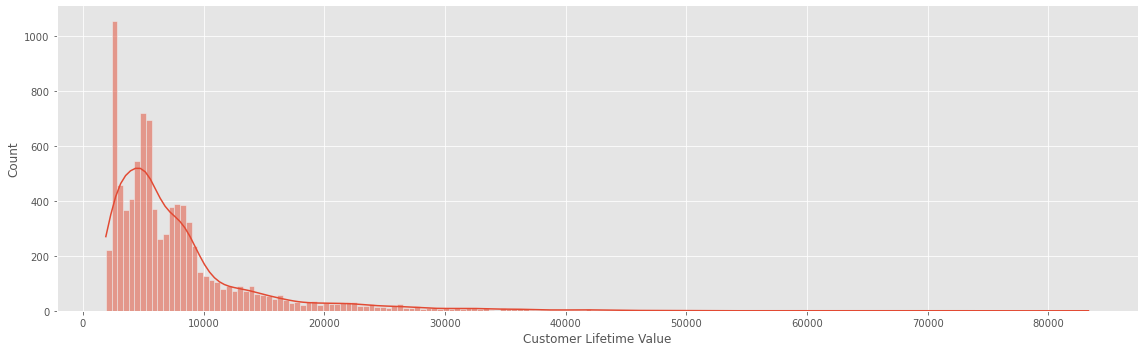

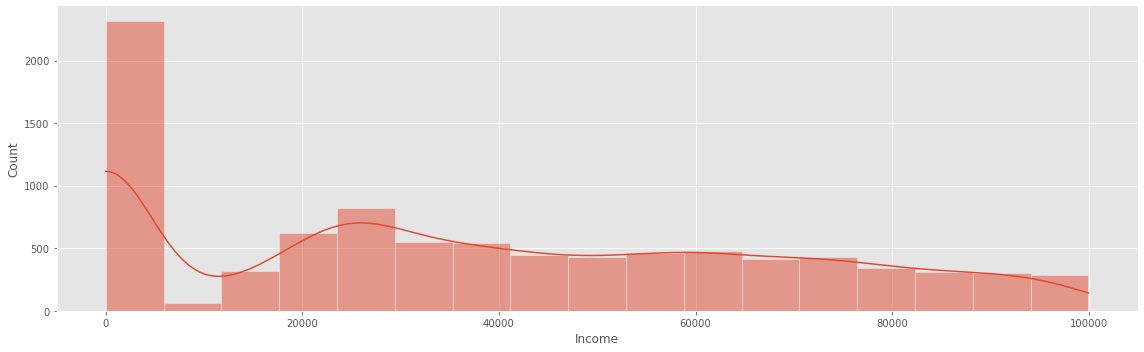

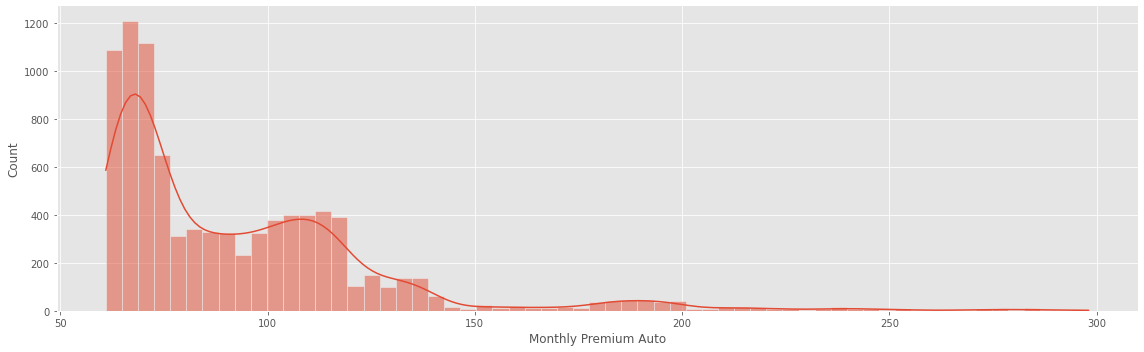

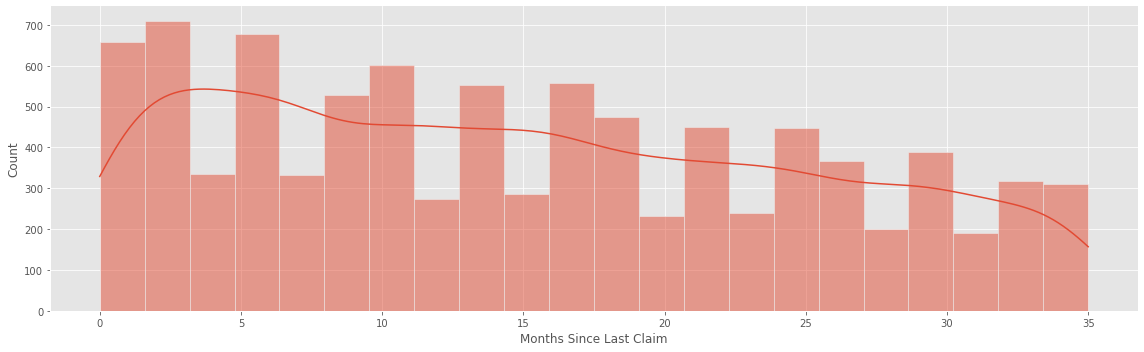

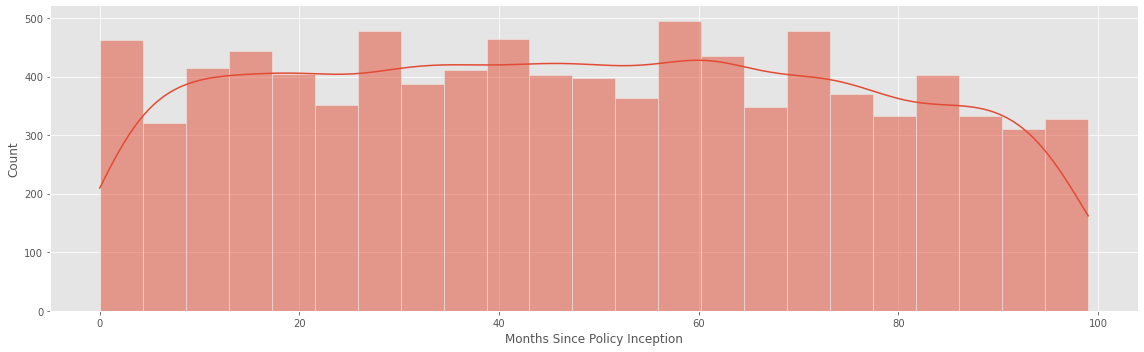

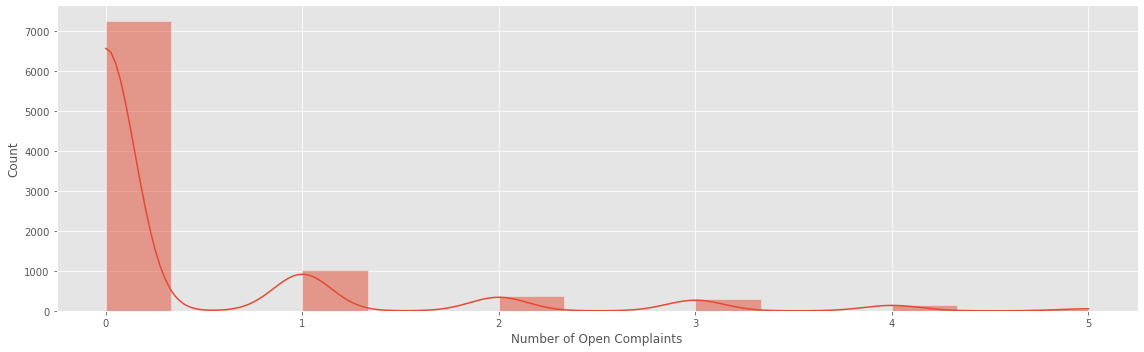

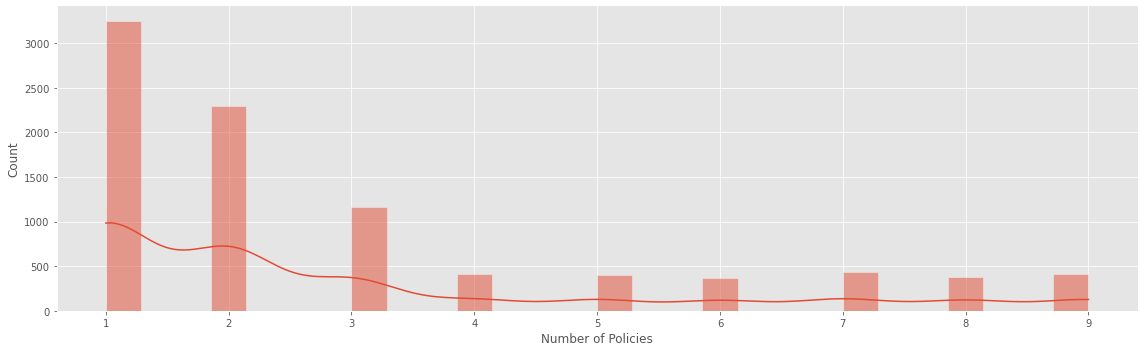

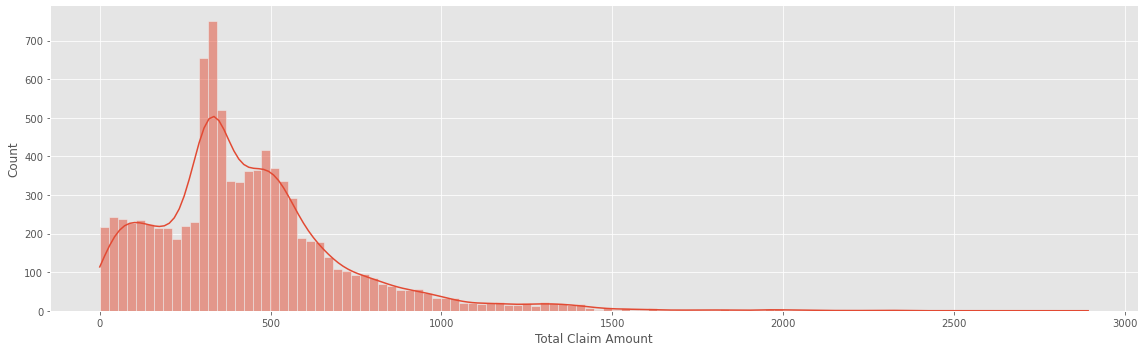

In [8]:
# We plot some histograms of the categoraical values to see the shape and how the date of each feature is structured.
# We use a for loop to iterate over all the numerical columns.
for col in numerical.columns:
    sns.displot(x=numerical[col], kde=True, height=5, aspect=16/5)
    plt.show()

Through this analysis, we can simplfy the dataset by droping some features that do not correspond to normal distributions and can be neglected in a first approach to the analysis.

In [9]:
numerical.drop(["Months Since Last Claim", "Months Since Policy Inception", "Number of Open Complaints", "Number of Policies"], axis=1, inplace=True)
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


### Categoricals

In [10]:
categorical = pd.DataFrame(df.select_dtypes(object))
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


We will drop some columns from the categorical that seem independent to the other features or that every entry is a unique value: Customer, Response and Effective To Date.

In [11]:
categorical.drop(["Customer", "Response", "Effective To Date"], axis=1, inplace=True)
categorical.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Encoding categoricals

In [12]:
categorical.nunique()

State               5
Coverage            3
Education           5
EmploymentStatus    5
Gender              2
Location Code       3
Marital Status      3
Policy Type         3
Policy              9
Renew Offer Type    4
Sales Channel       4
Vehicle Class       6
Vehicle Size        3
dtype: int64

In [13]:
for col in categorical:
    print(col)
    print(categorical[col].unique())

State
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Coverage
['Basic' 'Extended' 'Premium']
Education
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
EmploymentStatus
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Gender
['F' 'M']
Location Code
['Suburban' 'Rural' 'Urban']
Marital Status
['Married' 'Single' 'Divorced']
Policy Type
['Corporate Auto' 'Personal Auto' 'Special Auto']
Policy
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Renew Offer Type
['Offer1' 'Offer3' 'Offer2' 'Offer4']
Sales Channel
['Agent' 'Call Center' 'Web' 'Branch']
Vehicle Class
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
Vehicle Size
['Medsize' 'Small' 'Large']


In [14]:
print(categorical.columns)

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [15]:
# we will not use the dummies because we will use the OneHot Encoder once the data is splited in train-test.
categorical_dummy = pd.get_dummies(categorical.loc[:, ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']])
categorical_dummy

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Coverage_Basic,Coverage_Extended,Coverage_Premium,Education_Bachelor,Education_College,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
9131,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0


# Bivariate Numerical Analysis

Let's begin with the numericals correlations.

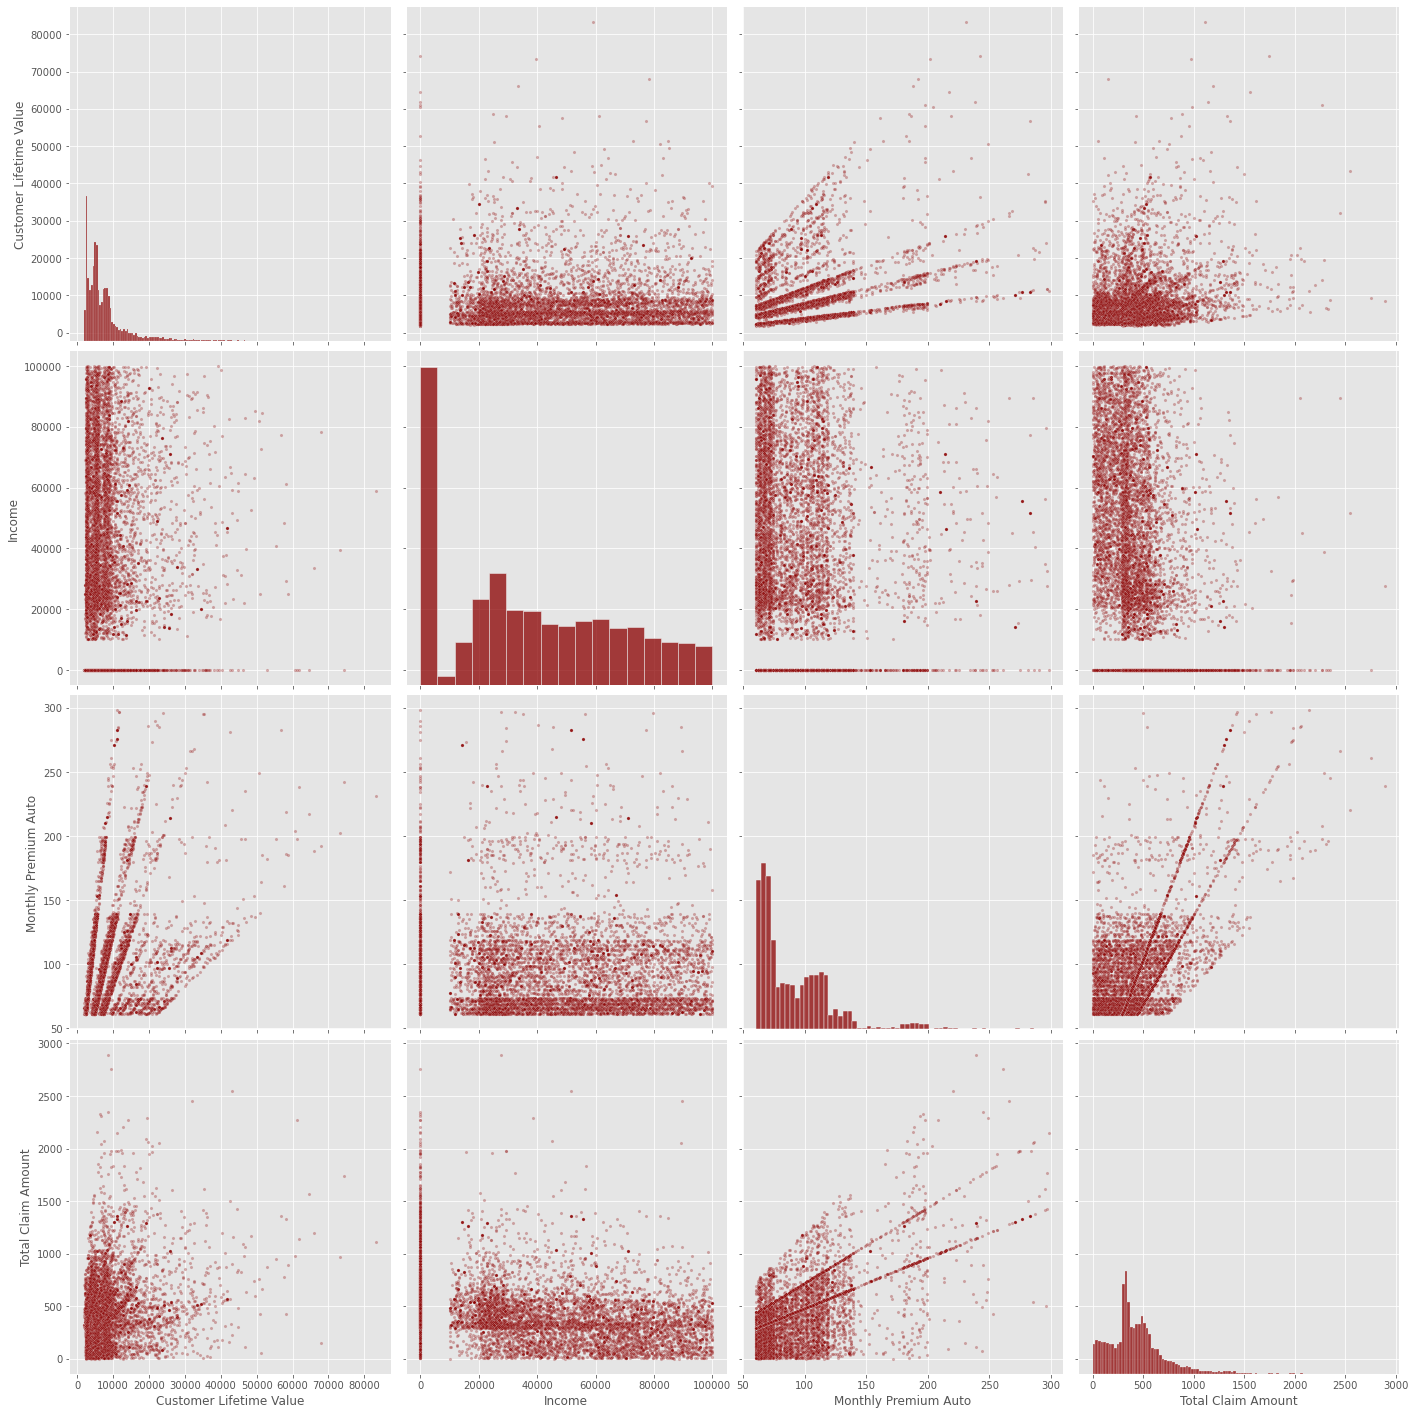

In [16]:
sns.pairplot(numerical, diag_kws = {"color":"darkred"}, plot_kws = {"color":"darkred","alpha":0.3,"s":10}, height = 5)

In [17]:
numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Total Claim Amount'],
      dtype='object')

Customer Lifetime Value


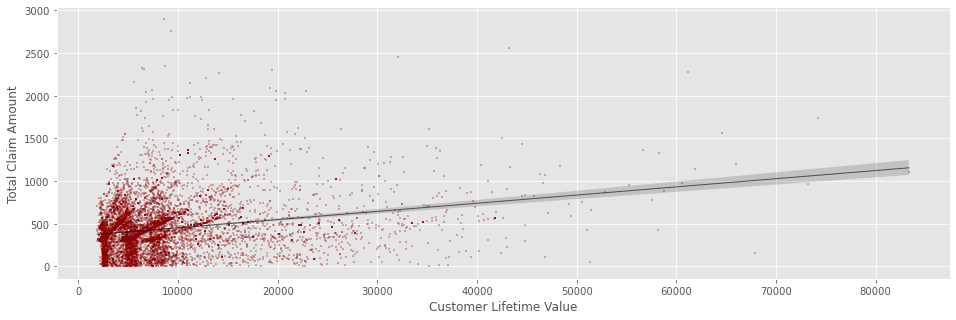

Income


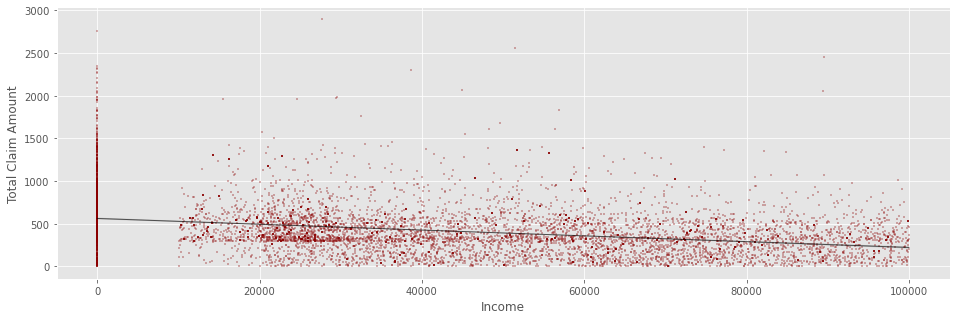

Monthly Premium Auto


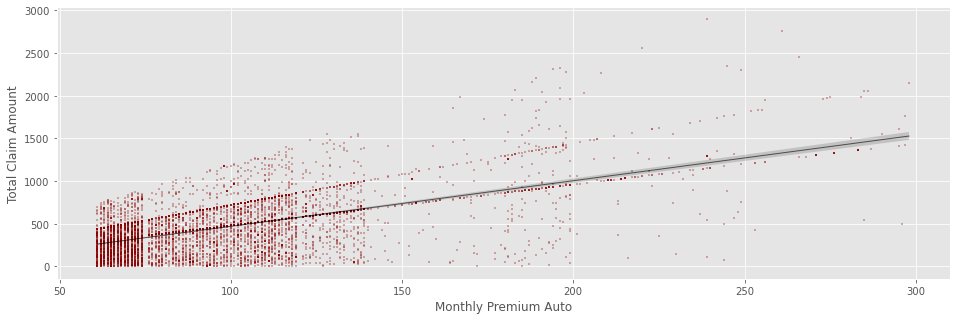

In [18]:
#regplot
for i in ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto']:
    print(i)
    plt.figure(figsize = [16, 5])
    sns.regplot(x=i, y='Total Claim Amount', data=numerical, line_kws={"color":"k","alpha":0.6,"lw":1}, scatter_kws={"color":"darkred","alpha":0.3,"s":2}, marker="+")
    plt.show()

The regplot show that our numerical data is not well fitted. The correlations are weak for a Linear Regression.

In [19]:
correlation = numerical.corr(method="pearson")
correlation

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.226451
Income,0.024366,1.000000,-0.016665,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.632017
Total Claim Amount,0.226451,-0.355254,0.632017,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

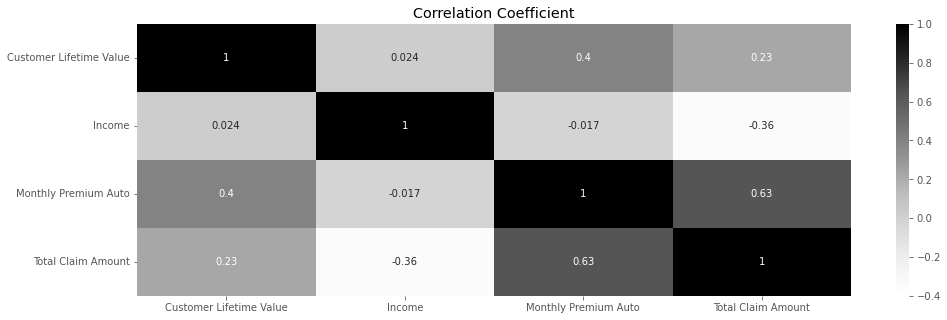

In [20]:
#heatmap

plt.figure(figsize = [16, 5])
sns_plot = sns.heatmap(correlation, annot=True, vmin=-0.4, vmax=1, cmap="Greys")
plt.title('Correlation Coefficient')
plt.show

There are no strong correlations between the numerical values. 
The strongest correlations are:<br>
- Total Claim Amount & Customer Lifetime Value = 0.23<br>
- Total Claim Amount & Income = -0.36<br>
- Total Claim Amount & Monthly Premium Auto = 0.63<br>
- Customer Lifetime Value & Monthly Premium Auto = 0.40

# Concat the Dataset (df_clear)

We will concat the dataset. We will apply the scaler and the encoder once the data is splitted in train-test. 

In [21]:
df_clear = pd.concat([numerical, categorical], axis=1)
df_clear

,Customer Lifetime Value,Income,Monthly Premium Auto,Total Claim Amount,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,56274,69,384.811147,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,1131.464935,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,566.472247,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,529.881344,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,2813.692575,43836,73,138.130879,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,198.234764,California,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,3096.511217,21604,79,379.200000,California,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,8163.890428,0,85,790.784983,California,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,7524.442436,21941,96,691.200000,California,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [22]:
df_clear.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Total Claim Amount', 'State', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [23]:
df_clear = df_clear.reindex(columns=['Total Claim Amount', 'Customer Lifetime Value', 'Income',
                                        'Monthly Premium Auto','State', 'Coverage', 'Education',
                                        'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
                                        'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
                                        'Vehicle Class', 'Vehicle Size'])
df_clear

,Total Claim Amount,Customer Lifetime Value,Income,Monthly Premium Auto,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,384.811147,2763.519279,56274,69,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,1131.464935,6979.535903,0,94,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,566.472247,12887.431650,48767,108,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,529.881344,7645.861827,0,106,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,138.130879,2813.692575,43836,73,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,198.234764,23405.987980,71941,73,California,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,379.200000,3096.511217,21604,79,California,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,790.784983,8163.890428,0,85,California,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,691.200000,7524.442436,21941,96,California,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


# Linear Regression

## X-y split

We want to explain the Total Claim Amount in terms of the Monthly Premium Auto and the Customer Lifetime Value. So the Total Claim Amount is going to be the Target Variable (y), and the rest of the variables are going to be the Explanatory Features (X).

In [24]:
df_clear.head(2)

,Total Claim Amount,Customer Lifetime Value,Income,Monthly Premium Auto,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,384.811147,2763.519279,56274,69,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,1131.464935,6979.535903,0,94,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


In [25]:
X = df_clear.iloc[:, 1:] # explanatory features
y = df_clear.iloc[:, 0] # target variabe

In [26]:
X.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,56274,69,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


In [27]:
y.head(2)

0     384.811147
1    1131.464935
Name: Total Claim Amount, dtype: float64

## Train-test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [29]:
X_train.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
1461,14082.639180,0,102,Washington,Premium,College,Unemployed,M,Suburban,Single,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Large
2521,8133.157212,32021,70,Arizona,Basic,Bachelor,Employed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Call Center,Four-Door Car,Small


In [30]:
X_train.shape

(7307, 16)

In [31]:
y_train.head(2)

1461    734.4
2521    336.0
Name: Total Claim Amount, dtype: float64

In [32]:
y_train.shape

(7307,)

## Perform scaling on training explanatory features.

We are going to apply the ColumnTransformer to the X_train split. The OneHot Encoder for the categorical values and the StandardScaler to the numerical values. 

In [33]:
df_clear.columns

Index(['Total Claim Amount', 'Customer Lifetime Value', 'Income',
       'Monthly Premium Auto', 'State', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [34]:
numerical_features = [0, 1, 2] 
categorical_features = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

encoder = ColumnTransformer (
        transformers = [              
        ("num", num_transformer, numerical_features), # to numerical we apply the Standard Scaler
        ("cat", cat_transformer, categorical_features) # to categorical we apply OneHotEncoder
        ])

X_train = encoder.fit_transform(X_train)

In [35]:
X_train

<7307x58 sparse matrix of type '<class 'numpy.float64'>'
	with 116912 stored elements in Compressed Sparse Row format>

## Model creating

In [36]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [37]:
print(f" COEFFICIENTS:\n{reg.coef_}")
print(f" INTERCEPT:\n{reg.intercept_}")

 COEFFICIENTS:
[-9.82613809e-02 -7.78263329e+00  1.68293551e+02 -4.53606753e+00
  2.28011284e+00  2.95206789e+00 -4.44112634e+00  3.74501315e+00
  6.52127950e-01 -9.21935869e+00  8.56723074e+00  2.06199908e+00
 -1.35205560e+00 -1.27194012e+01  1.74460634e+01 -5.43660570e+00
 -1.15027327e+01 -1.99910464e+01 -3.76572391e+00 -2.38739847e+01
  5.91334878e+01 -7.25700153e+00  7.25700153e+00 -1.97028022e+02
  1.75384482e+02  2.16435404e+01 -1.78410252e+01 -2.37610074e+01
  4.16020326e+01 -4.85570761e+00 -6.20409434e+00  1.10598019e+01
  1.16875333e+00 -6.05931571e+00  3.48547666e-02 -7.67622930e-01
 -2.34538789e+00 -3.09108352e+00  3.18867296e+01 -4.63202242e+00
 -1.61949052e+01 -8.91488988e+00  4.14771039e+00  3.97250784e+00
  7.94671656e-01 -5.99517142e-01  1.77242504e+00 -2.17258154e+00
  9.99673643e-01 -1.18645907e+01  5.10192880e+01  1.96528598e+01
 -1.65586595e+01 -2.77616428e+01 -1.44872548e+01  4.90597333e+00
 -7.20283342e+00  2.29686009e+00]
 INTERCEPT:
384.54503050206245


We are going to use the get_feature_names on the encoder to get the features' name and compare them to the coefficient given by the regressor. We will also add a new label to re-group the encoded categorical elements.

In [116]:
feature_importance = pd.DataFrame({
    "feature_name": encoder.get_feature_names_out(),
    "coefficients": reg.coef_,
    "label": ""
    })


feature_importance.loc[feature_importance["feature_name"].str.contains("cat__Sta", case=False), "label"] = "STA"
feature_importance.loc[feature_importance["feature_name"].str.contains("cat__Cov", case=False), "label"] = "COV"
feature_importance.loc[feature_importance["feature_name"].str.contains("cat__Edu", case=False), "label"] = "EDU"
feature_importance.loc[feature_importance["feature_name"].str.contains("cat__Emp", case=False), "label"] = "EMP"
feature_importance.loc[feature_importance["feature_name"].str.contains("cat__Gen", case=False), "label"] = "GEN"
feature_importance.loc[feature_importance["feature_name"].str.contains("cat__Loc", case=False), "label"] = "LOC"
feature_importance.loc[feature_importance["feature_name"].str.contains("cat__Mar", case=False), "label"] = "MAR"
feature_importance.loc[feature_importance["feature_name"].str.contains("cat__Pol", case=False), "label"] = "POL"
feature_importance.loc[feature_importance["feature_name"].str.contains("cat__Ren", case=False), "label"] = "REN"
feature_importance.loc[feature_importance["feature_name"].str.contains("cat__Sal", case=False), "label"] = "SAL"
feature_importance.loc[feature_importance["feature_name"].str.contains("cat__Veh", case=False), "label"] = "VEH"
feature_importance.loc[feature_importance["feature_name"].str.contains("num__", case=False), "label"] = "NUM"

# Yes, probably there exist a for loop to do that, using the original columns name or something, I couldn't think of it.

feature_importance["coefficients"] = feature_importance["coefficients"].abs()
feature_importance.sort_values(by="coefficients", ascending=False)

,feature_name,coefficients,label
13,cat__Location Code_Rural,199.937753,LOC
14,cat__Location Code_Suburban,181.798579,LOC
2,num__Monthly Premium Auto,174.484167,NUM
12,cat__EmploymentStatus_Unemployed,56.863173,EMP
18,cat__Marital Status_Single,41.861647,MAR
17,cat__Marital Status_Married,23.206327,MAR
9,cat__EmploymentStatus_Employed,21.118542,EMP
16,cat__Marital Status_Divorced,18.655320,MAR
15,cat__Location Code_Urban,18.139174,LOC
8,cat__EmploymentStatus_Disabled,15.018328,EMP


This allows us to see the importance of each feature in the regression model we are testing. Lets create a visualization for those results.

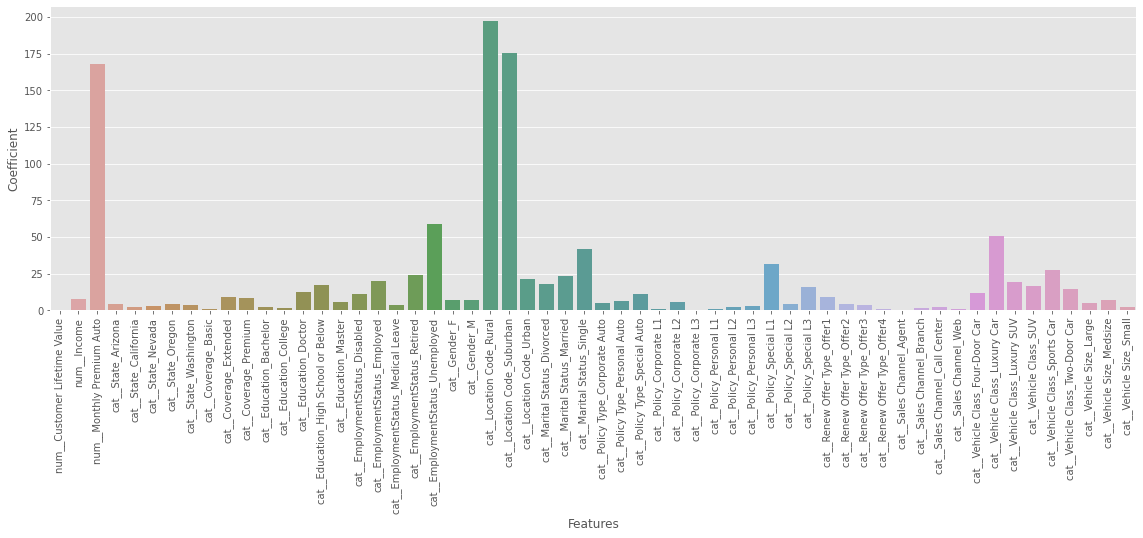

In [39]:
g = sns.catplot(x="feature_name", y="coefficients",
                data=feature_importance,
                saturation=.5,
                kind="bar",
                aspect=17/5)
g.set_axis_labels("Features", "Coefficient").set_xticklabels(rotation=90)

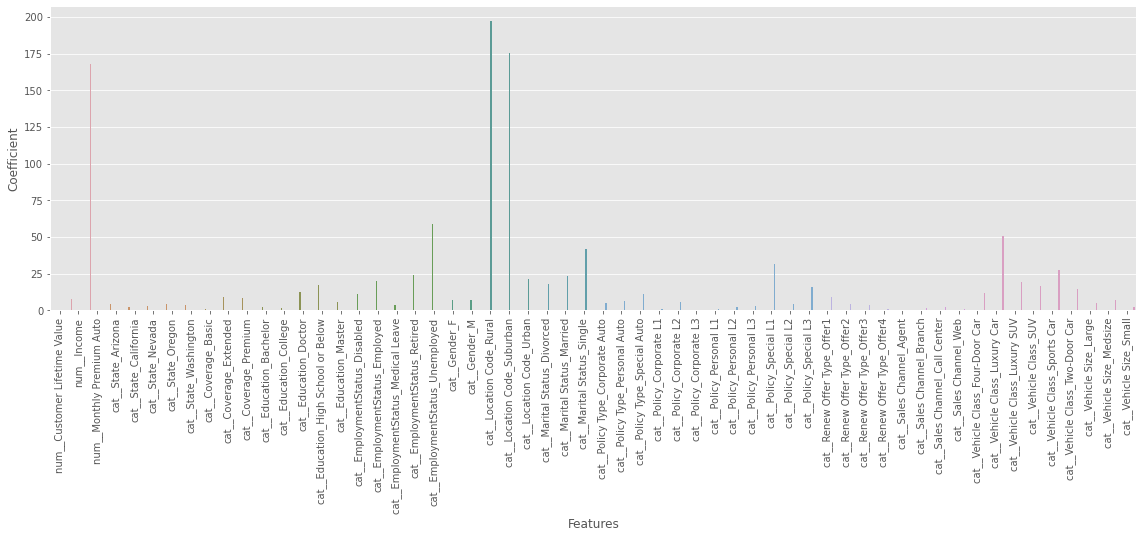

In [40]:
g = sns.catplot(x="feature_name", y="coefficients",
                data=feature_importance,
                saturation=.5,
                kind="bar",
                aspect=17/5,
                hue="label",
                legend=False)
g.set_axis_labels("Features", "Coefficient").set_xticklabels(rotation=90)

# Here, the idea was to show the same plot but hued by the label, to see which grouped categorical variable is
# more important. But I don't know why it ploted the bars so slim. It is the same syntax as before, but with the
# hue parameter.

From this, we can infere that some categorical features have a relatively high impact on the Total Claim Amount, such as Location, the Marital Status, Vehicle Class and Employment Status. The Monthly Premium Auto is the highest numerical value with an impact on the Total Claim Amount.

## Predictions

We can run some predictions on the train test using the regressor line built.

In [41]:
y_train_pred = reg.predict(X_train)
y_train_pred

array([705.20432307, 432.320022  , 490.7395188 , ..., 382.18199303,
       574.14481851, 673.18652265])

We will as well run some predictions on the test set.

In [42]:
X_test = encoder.transform(X_test) # we are using the mean and the standard deviation from the train encoding.

In [43]:
y_test_pred = reg.predict(X_test)
y_test_pred

array([370.9209694 , 495.64765653, 629.18646614, ..., 746.04285506,
       551.03555316, 235.60799485])

# Evaluation of the model

### R2 score

In [44]:
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_train

0.7742049680716272

In [45]:
r_squared_test = r2_score(y_test, y_test_pred)
r_squared_test

0.7597811693930845

In [46]:
print(f"the r2 score on train:", r_squared_train.round(2))
print("the r2 score on test:", r_squared_test.round(2))
if r_squared_train > r_squared_test:
    print("The model is overfitting")
elif r_squared_train < r_squared_test:
    print("The model is underfitting")

the r2 score on train: 0.77
the r2 score on test: 0.76
The model is overfitting


The model is performing slightly well, and it is niether overfitting nor underfitting. 


### RMSE

In [47]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round(2)
rmse_train

137.91

In [48]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round(2)
rmse_test

142.84

In [49]:
print(f"the rmse score on train:", rmse_train.round(2))
print("the rmse score on test:", rmse_test.round(2))

the rmse score on train: 137.91
the rmse score on test: 142.84


In [50]:
df["Total Claim Amount"].describe().round(2)

count    9134.00
mean      434.09
std       290.50
min         0.10
25%       272.26
50%       383.95
75%       547.51
max      2893.24
Name: Total Claim Amount, dtype: float64

Values of the RMSError are slightly big compared to the min and max values of the Total Claim Amount feature. It is around a half of the standard deviation of the dataset.

### Residuals

In [51]:
train_res = (y_train - y_train_pred)

<Figure size 432x288 with 0 Axes>

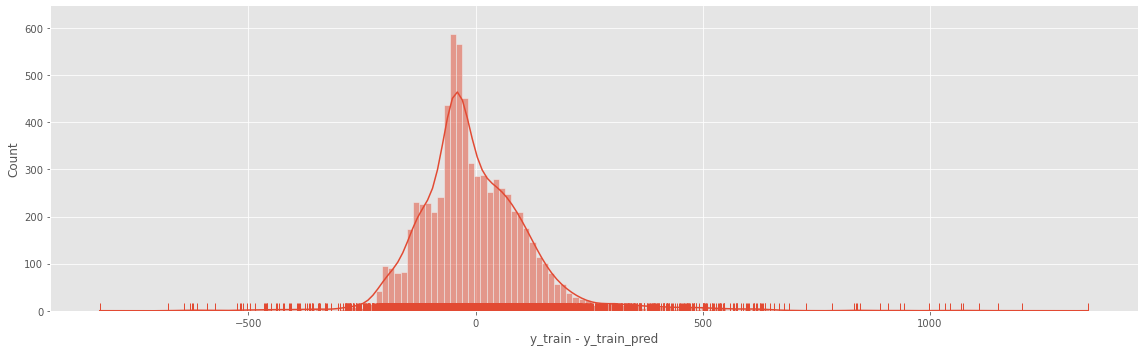

In [52]:
fig = plt.figure()
sns.displot(x=train_res, rug=True, kde=True, height=5, aspect=16/5) 
plt.xlabel('y_train - y_train_pred')
plt.show()

In [53]:
test_res = (y_test - y_test_pred)

<Figure size 432x288 with 0 Axes>

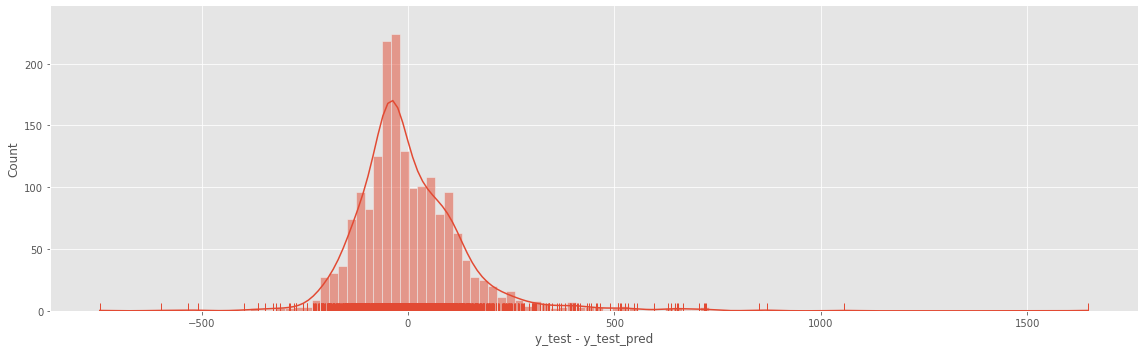

In [54]:
fig = plt.figure()
sns.displot(x=test_res, rug=True, kde=True, height=5, aspect=16/5) 
plt.xlabel('y_test - y_test_pred')
plt.show()

The residuals are normally distributed with a mean close to 0. All good!

# Improving the model tests:

For this first approach, I have used the data in the rawest possible form. I have only dropped some features and scaled the features after the train-test split. Now I will try to:
- Perform a more accurate feature selection revisiting the EDA process and keeping only the most significant features.
- Divide the data in two, splitting the analysis for the customers of Income == 0 and the customers of Income != 0. It will clean the outliers and carry a different perspective for this specific condition.
- Try different scalers for the significant data, according to its shape and structure. 


In [55]:
# I call again the df so it is clean and complete again
df = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
df.head(2).round(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.52,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.81,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.54,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.46,Four-Door Car,Medsize


In [56]:
# Drop the columns that are not interesting
df.drop(["Customer", "Effective To Date"], axis=1, inplace=True)
df.head(2)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


# Improving test 1: Feature Selection

### Pearsons Correlation

To find the most useful columns in the model, the target variable can be filtered from the correlation matrix. Since I am more interested in the magnitude of the correlation rather than its direction, I check the absolute of the matrix.

In [57]:
correlation = df.corr(method="pearson")
correlation

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


To find the most useful columns in the model, the target variable can be filtered from the correlation matrix. Since I am more interested in the magnitude of the correlation rather than its direction, I check the absolute of the matrix.

<function matplotlib.pyplot.show(close=None, block=None)>

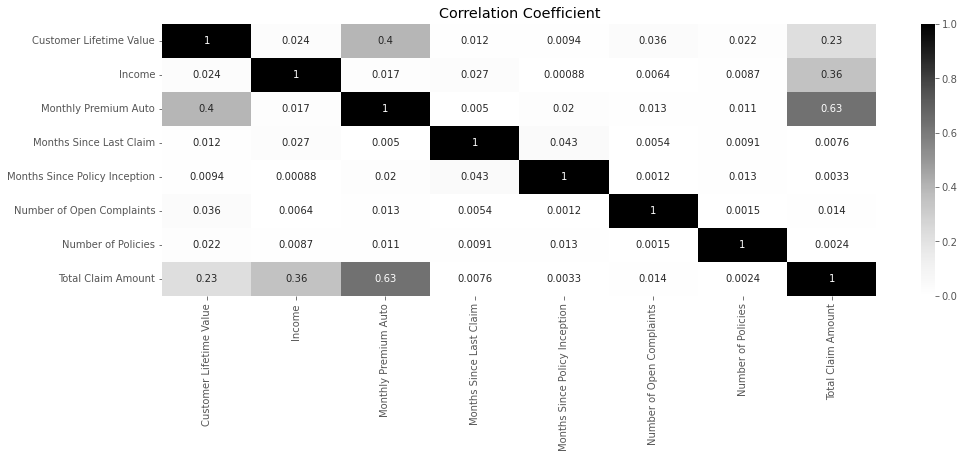

In [58]:
#heatmap
plt.figure(figsize = [16, 5])
sns_plot = sns.heatmap(correlation.abs(), annot=True, vmin=0, vmax=1, cmap="Greys")
plt.title('Correlation Coefficient')
plt.show

In [59]:
# creating dataframe including the correlations with Total Claim Amount
df_corr = abs(df.corr()).sort_values(by='Total Claim Amount', ascending=False)[['Total Claim Amount']]
# threshold of 0.4 is selected to filter the features
df_corr[df_corr['Total Claim Amount']>0.4]

,Total Claim Amount
Total Claim Amount,1.000000
Monthly Premium Auto,0.632017


### Split data in X-y train-test and scale

In [60]:
# reindex for easier spliting.
df_clear = df.reindex(columns=['Total Claim Amount', 'Customer Lifetime Value', 'Income', 
                           'Monthly Premium Auto', 'Months Since Last Claim',
                           'Months Since Policy Inception', 'Number of Open Complaints',
                           'Number of Policies','State', 
                           'Response', 'Coverage', 'Education',
                           'EmploymentStatus', 'Gender', 'Location Code',
                           'Marital Status',  'Policy Type', 'Policy', 'Renew Offer Type',
                           'Sales Channel', 'Vehicle Class', 'Vehicle Size'])
# X-y split
X = df_clear.iloc[:, 1:] # explanatory features
y = df_clear.iloc[:, 0] # target variabe = Total Claim Amount

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

# scaling
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

### Feature selection using the Correlation metric


For the correlation statistic we will use the f_regression() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

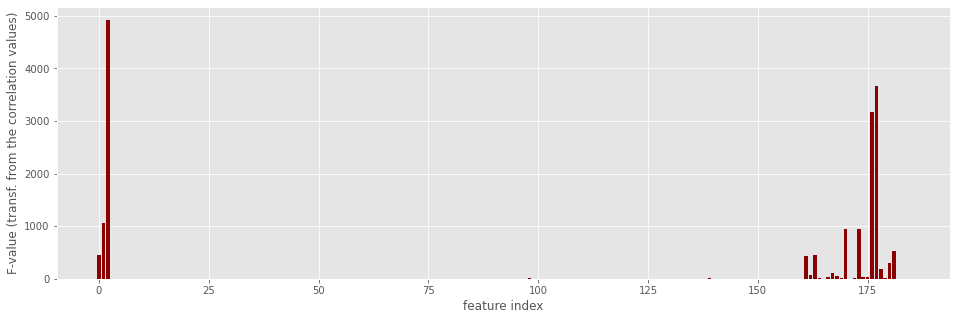

In [61]:
from sklearn import feature_selection

# feature selection
f_selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.figure(figsize = [16, 5])
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_, color="darkred")
plt.xlabel("feature index")
plt.ylabel("F-value (transf. from the correlation values)")
plt.show()

### Feature selection using the Mutual Information metric

The scikit-learn machine learning library provides an implementation of mutual information for feature selection with numeric input and output variables via the mutual_info_regression() function.

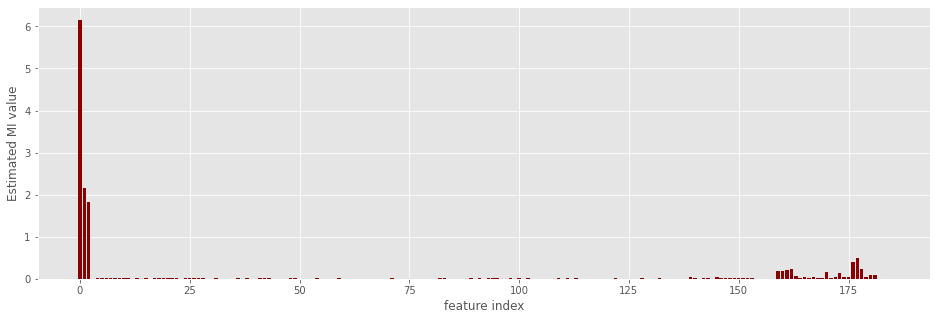

In [62]:
from sklearn import feature_selection

# feature selection
f_selector = feature_selection.SelectKBest(score_func=feature_selection.mutual_info_regression, k='all')
# learn relationship from training data
f_selector.fit(X_train, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_train)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.figure(figsize = [16, 5])
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_, color="darkred")
plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()

In [63]:
# These are the columns that are proven to have a significant importance to the Total Claim Amount. 
columns = pd.DataFrame(encoder.get_feature_names_out())
columns.iloc[[0, 1, 2, 159, 160, 161, 162, 163, 170, 173, 176, 177, 178, 180, 181], :]

,0
0,num__Customer Lifetime Value
1,num__Income
2,num__Monthly Premium Auto
159,cat__Response_No
160,cat__Response_Yes
161,cat__Coverage_Basic
162,cat__Coverage_Extended
163,cat__Coverage_Premium
170,cat__EmploymentStatus_Employed
173,cat__EmploymentStatus_Unemployed


I will fit a new model that runs only through the features:
   - Customer Lifetime Value
   - Income
   - Monthly Premium Auto
   - Response
   - Coverage
   - EmploymentStatus
   - Location
   - Marital Status

In [64]:
important_features_list = ['Total Claim Amount', 'Customer Lifetime Value','Income', 
                           'Monthly Premium Auto', 'Response', 'Coverage', 'EmploymentStatus', 
                           'Location Code', 'Marital Status']

### Data clean

In [65]:
df = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
df.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [66]:
df.drop(df.columns.difference(important_features_list), axis=1, inplace=True)
df_clear = df.reindex(columns=important_features_list)
df_clear.head(2)

,Total Claim Amount,Customer Lifetime Value,Income,Monthly Premium Auto,Response,Coverage,EmploymentStatus,Location Code,Marital Status
0,384.811147,2763.519279,56274,69,No,Basic,Employed,Suburban,Married
1,1131.464935,6979.535903,0,94,No,Extended,Unemployed,Suburban,Single


In [67]:
df_clear.describe(include="all")

,Total Claim Amount,Customer Lifetime Value,Income,Monthly Premium Auto,Response,Coverage,EmploymentStatus,Location Code,Marital Status
count,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134
unique,NaN,NaN,NaN,NaN,2,3,5,3,3
top,NaN,NaN,NaN,NaN,No,Basic,Employed,Suburban,Married
freq,NaN,NaN,NaN,NaN,7826,5568,5698,5779,5298
mean,434.088794,8004.940475,37657.380009,93.219291,NaN,NaN,NaN,NaN,NaN
std,290.500092,6870.967608,30379.904734,34.407967,NaN,NaN,NaN,NaN,NaN
min,0.099007,1898.007675,0.000000,61.000000,NaN,NaN,NaN,NaN,NaN
25%,272.258244,3994.251794,0.000000,68.000000,NaN,NaN,NaN,NaN,NaN
50%,383.945434,5780.182197,33889.500000,83.000000,NaN,NaN,NaN,NaN,NaN
75%,547.514839,8962.167041,62320.000000,109.000000,NaN,NaN,NaN,NaN,NaN


### New model and validating

In [68]:
# X-y split
X = df_clear.iloc[:, 1:] # explanatory features
y = df_clear.iloc[:, 0] # target variabe = Total Claim Amount

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [69]:
# new scaler
numerical_features = [0, 1, 2] 
categorical_features = [3, 4, 5, 6, 7]

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

encoder = ColumnTransformer (
        transformers = [              
        ("num", num_transformer, numerical_features), # to numerical we apply the Standard Scaler
        ("cat", cat_transformer, categorical_features) # to categorical we apply OneHotEncoder
        ])


In [70]:
X_train = encoder.fit_transform(X_train)

In [71]:
X_test = encoder.transform(X_test)

In [72]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [73]:
print(f" COEFFICIENTS:\n{reg.coef_}")
print(f" INTERCEPT:\n{reg.intercept_}")

 COEFFICIENTS:
[  -0.5410756    -5.4128349   174.48416724   13.48717007  -13.48717007
    5.26019876   -8.87153402    3.61133526  -15.01832759  -21.11854239
   -6.35819099  -14.36811202   56.86317299 -199.93775332  181.79857945
   18.13917387  -18.65532002  -23.20632666   41.86164668]
 INTERCEPT:
348.42909317144154


In [74]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

### R2 Score

In [75]:
r_squared_train_2 = r2_score(y_train, y_train_pred)
r_squared_test_2 = r2_score(y_test, y_test_pred)
print(f"the r2 score on train:", r_squared_train_2.round(2))
print("the r2 score on test:", r_squared_test_2.round(2))
if r_squared_train_2 > r_squared_test_2:
    print("The model is overfitting")
elif r_squared_train_2 < r_squared_test_2:
    print("The model is underfitting")

the r2 score on train: 0.77
the r2 score on test: 0.76
The model is overfitting


### RMSE

In [76]:
rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_train_pred)).round(2)
rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_test_pred)).round(2)
print(f"the rmse score on train:", rmse_train_2.round(2))
print("the rmse score on test:", rmse_test_2.round(2))

the rmse score on train: 138.79
the rmse score on test: 143.39


### Evaluation

In [77]:
print(f"R2 train original : {r_squared_train.round(2)} - {r_squared_train_2.round(2)} : R2 train improved 1")
print(f"R2 test original : {r_squared_test.round(2)} - {r_squared_test_2.round(2)} : R2 test improved 1")
print(f"RMSE train original : {rmse_train.round(2)} - {rmse_train_2.round(2)} : RMSE train improved 1")
print(f"RMSE test original : {rmse_test.round(2)} - {rmse_test_2.round(2)} : RMSE test improved 1")

R2 train original : 0.77 - 0.77 : R2 train improved 1
R2 test original : 0.76 - 0.76 : R2 test improved 1
RMSE train original : 137.91 - 138.79 : RMSE train improved 1
RMSE test original : 142.84 - 143.39 : RMSE test improved 1


R2 Score is identical to the previous model, and RMSE has incresed by 1 in that model, so we can conclude that a thorough feature selection is not improving the Linear Regression Model

# Improvig test 2: Data Splitting

In [78]:
# I call again the df so it is clean and complete again
df = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
# Drop the columns that are not interesting
df.drop(["Customer", "Effective To Date"], axis=1, inplace=True)
df.head(2)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


### Split df EDA

In [96]:
df_split_income = df[df['Income'] > 0]
df_split_income.head(2)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


In [97]:
df_split_income.describe(include="all")

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,6817,6817.000000,6817,6817,6817,6817,6817,6817.000000,6817,6817,...,6817.000000,6817.000000,6817.000000,6817,6817,6817,6817,6817.000000,6817,6817
unique,5,NaN,2,3,5,4,2,NaN,3,3,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,California,NaN,No,Basic,Bachelor,Employed,F,NaN,Suburban,Married,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,2346,NaN,5707,4178,2037,5698,3523,NaN,3657,4522,...,NaN,NaN,NaN,5068,2559,2523,2573,NaN,3465,4827
mean,NaN,8130.229340,NaN,NaN,NaN,NaN,NaN,50456.580461,NaN,NaN,...,47.832624,0.381840,2.951005,NaN,NaN,NaN,NaN,377.840789,NaN,NaN
std,NaN,6949.067972,NaN,NaN,NaN,NaN,NaN,24305.956566,NaN,NaN,...,27.895350,0.905048,2.390613,NaN,NaN,NaN,NaN,252.648952,NaN,NaN
min,NaN,2119.894333,NaN,NaN,NaN,NaN,NaN,10037.000000,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,4090.750678,NaN,NaN,NaN,NaN,NaN,28432.000000,NaN,NaN,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,210.100003,NaN,NaN
50%,NaN,5810.630529,NaN,NaN,NaN,NaN,NaN,48081.000000,NaN,NaN,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,340.800000,NaN,NaN
75%,NaN,9075.768214,NaN,NaN,NaN,NaN,NaN,70187.000000,NaN,NaN,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,498.612632,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

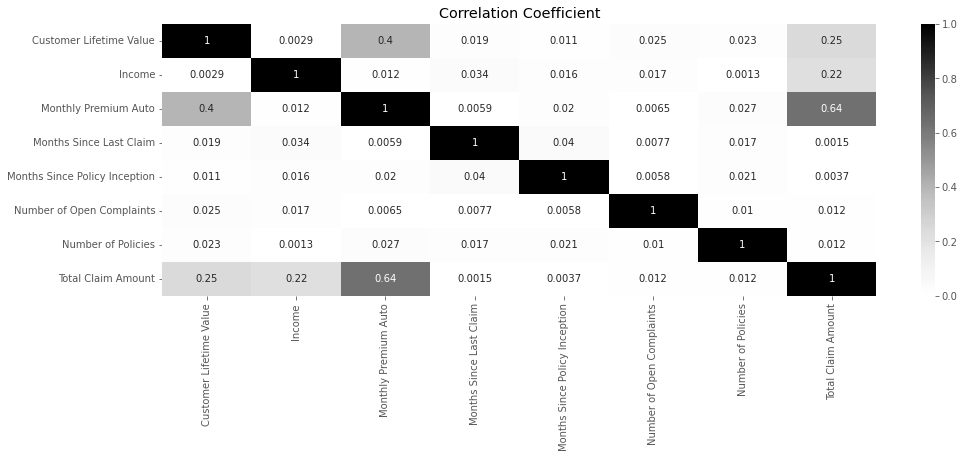

In [98]:
correlation_split = df_split_income.corr(method="pearson")
plt.figure(figsize = [16, 5])
sns_plot = sns.heatmap(correlation_split.abs(), annot=True, vmin=0, vmax=1, cmap="Greys")
plt.title('Correlation Coefficient')
plt.show

In [111]:
# creating dataframe including the correlations with Total Claim Amount
df_corr = abs(df.corr()).sort_values(by='Total Claim Amount', ascending=False)[['Total Claim Amount']]
# threshold of 0.2 is selected to filter the features
df_corr[df_corr['Total Claim Amount']>0.2]

,Total Claim Amount
Total Claim Amount,1.000000
Monthly Premium Auto,0.632017
Income,0.355254
Customer Lifetime Value,0.226451


Correlation scores haven't changed a bit!

### Outliers and Scalers

In [100]:
pd.DataFrame(df_split_income.select_dtypes(np.number)).columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

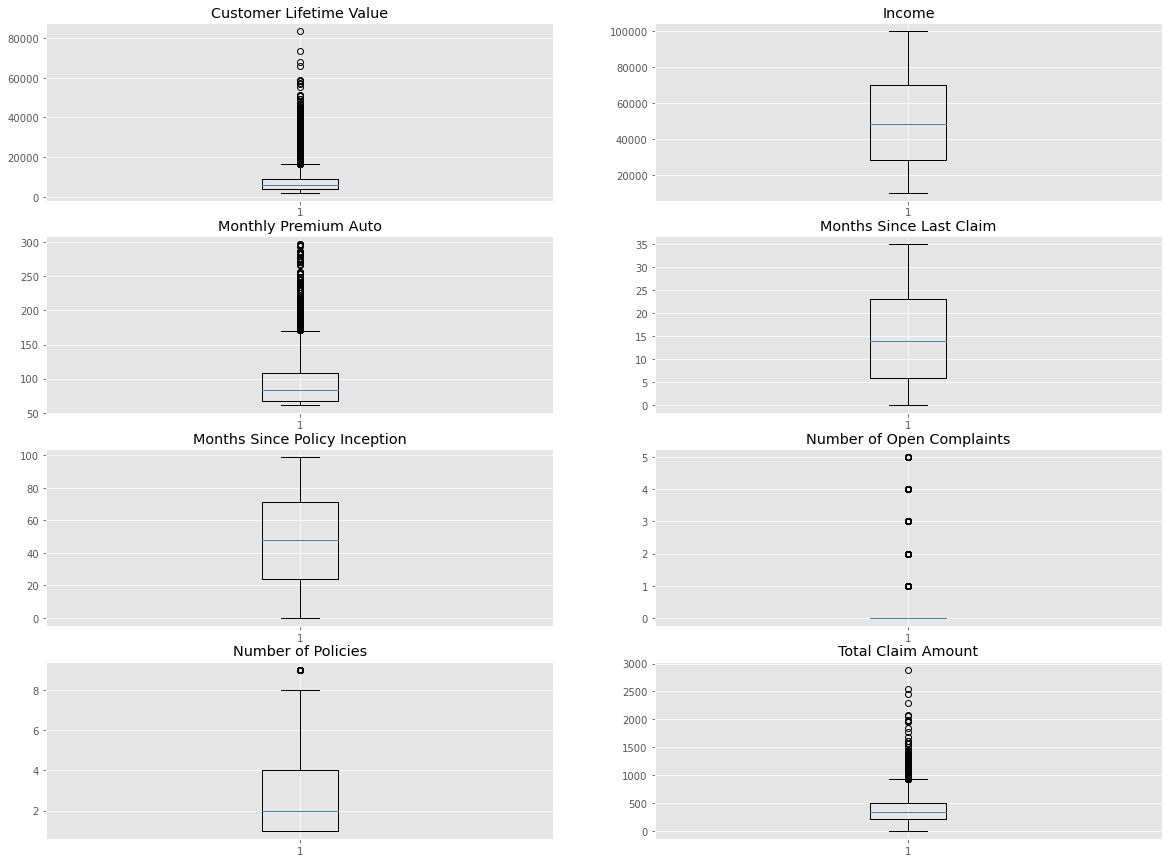

In [105]:
fig, axs = plt.subplots(4, 2, figsize=(20,15))

axs[0, 0].boxplot(df_split_income['Customer Lifetime Value'])
axs[0, 1].boxplot(df_split_income['Income'])
axs[1, 0].boxplot(df_split_income['Monthly Premium Auto'])
axs[1, 1].boxplot(df_split_income['Months Since Last Claim'])
axs[2, 0].boxplot(df_split_income['Months Since Policy Inception'])
axs[2, 1].boxplot(df_split_income['Number of Open Complaints'])
axs[3, 0].boxplot(df_split_income['Number of Policies'])
axs[3, 1].boxplot(df_split_income['Total Claim Amount'])

axs[0, 0].title.set_text('Customer Lifetime Value')
axs[0, 1].title.set_text('Income')
axs[1, 0].title.set_text('Monthly Premium Auto')
axs[1, 1].title.set_text('Months Since Last Claim')
axs[2, 0].title.set_text('Months Since Policy Inception')
axs[2, 1].title.set_text('Number of Open Complaints')
axs[3, 0].title.set_text('Number of Policies')
axs[3, 1].title.set_text('Total Claim Amount')

plt.show()

In [107]:
cols = pd.DataFrame(df_split_income.select_dtypes(np.number)).columns

Q1 = df_split_income.quantile(0.25)
Q3 = df_split_income.quantile(0.75)
IQR = Q3 - Q1

df_split_income = df_split_income[~((df_split_income[cols] < (Q1 - 1.5 * IQR)) |(df_split_income[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

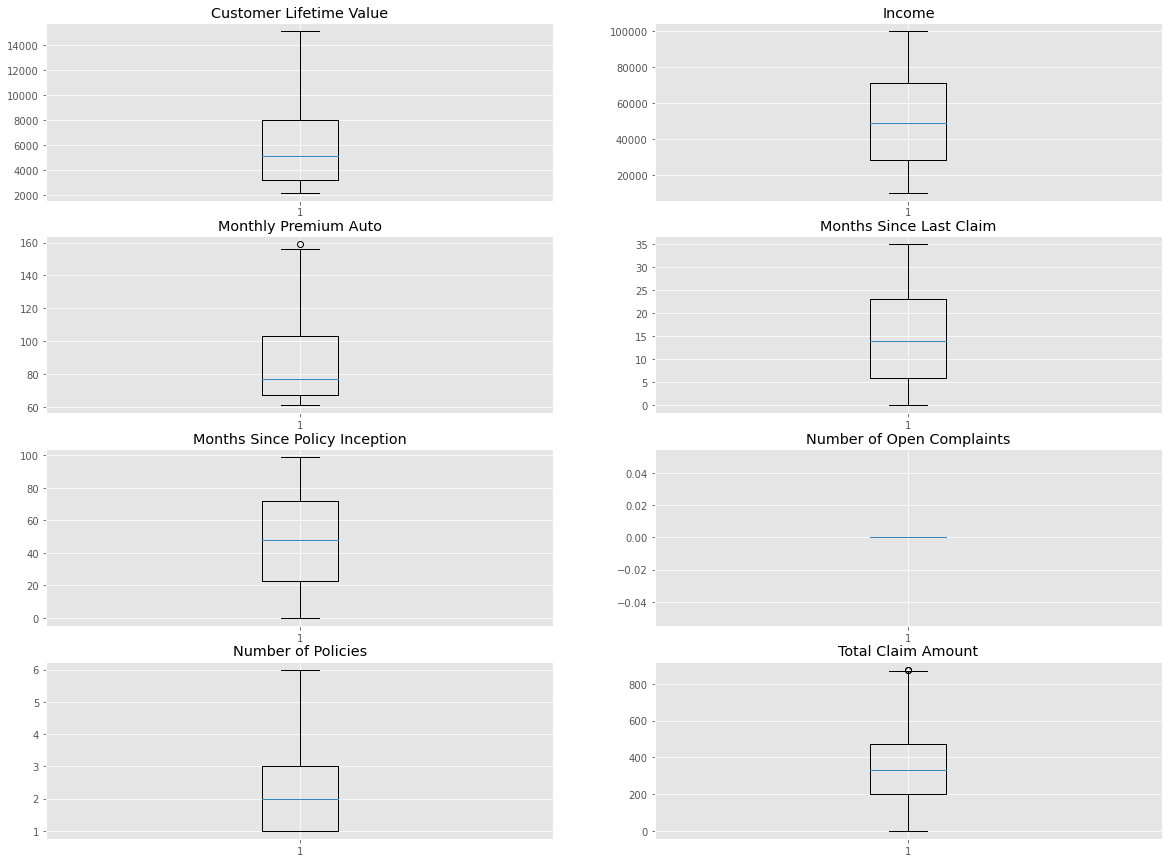

In [109]:
fig, axs = plt.subplots(4, 2, figsize=(20,15))

axs[0, 0].boxplot(df_split_income['Customer Lifetime Value'])
axs[0, 1].boxplot(df_split_income['Income'])
axs[1, 0].boxplot(df_split_income['Monthly Premium Auto'])
axs[1, 1].boxplot(df_split_income['Months Since Last Claim'])
axs[2, 0].boxplot(df_split_income['Months Since Policy Inception'])
axs[2, 1].boxplot(df_split_income['Number of Open Complaints'])
axs[3, 0].boxplot(df_split_income['Number of Policies'])
axs[3, 1].boxplot(df_split_income['Total Claim Amount'])

axs[0, 0].title.set_text('Customer Lifetime Value')
axs[0, 1].title.set_text('Income')
axs[1, 0].title.set_text('Monthly Premium Auto')
axs[1, 1].title.set_text('Months Since Last Claim')
axs[2, 0].title.set_text('Months Since Policy Inception')
axs[2, 1].title.set_text('Number of Open Complaints')
axs[3, 0].title.set_text('Number of Policies')
axs[3, 1].title.set_text('Total Claim Amount')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

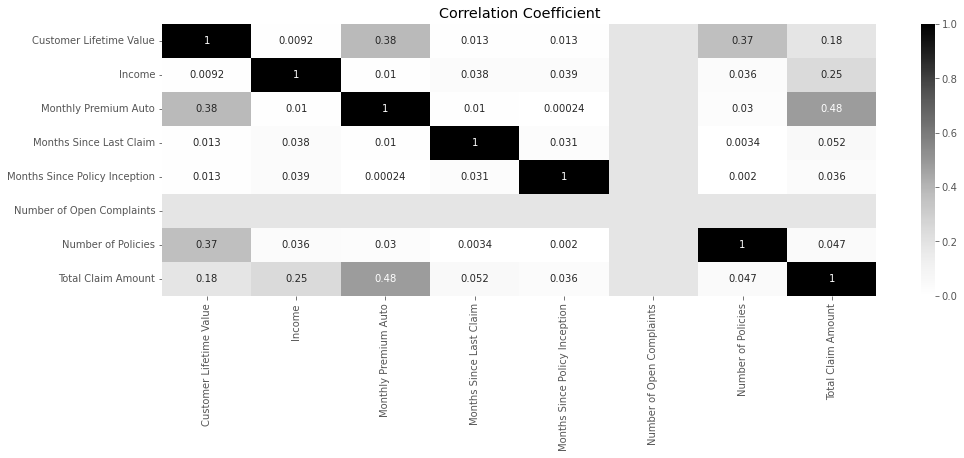

In [112]:
correlation_split_outliers = df_split_income.corr(method="pearson")
plt.figure(figsize = [16, 5])
sns_plot = sns.heatmap(correlation_split_outliers.abs(), annot=True, vmin=0, vmax=1, cmap="Greys")
plt.title('Correlation Coefficient')
plt.show

In [114]:
# creating dataframe including the correlations with Total Claim Amount
df_corr = abs(df_split_income.corr()).sort_values(by='Total Claim Amount', ascending=False)[['Total Claim Amount']]
# threshold of 0.2 is selected to filter the features
df_corr[df_corr['Total Claim Amount']>0.2]

,Total Claim Amount
Total Claim Amount,1.000000
Monthly Premium Auto,0.481366
Income,0.248234


Removing the outliers has decreased the correlation between features.

Probably, the best model was the first one.

# Making new predictions

Let's create a new assumption, to predict the Total Claim Amount with the Regression Model.

In [ ]:
new_data = [[# need to invent a list of data, but this is tricky, since the encoding of the categorical 
            # values make it difficult to obtain]]

y_new = regressor.predict(encoder.transform(new_data))
print("Predicted Total Claim Amount: {:0,.2f}€".format(float(y_new)))

# Results

I have obtained a model that scores 0.77 on the train and 0.76 on the test and that allows us to say:
- one of the most important features to predict the Target feature is the location of the customers. Living un rural areas has a negative impact on the Amount Claimed, whereas living in urban or suburban areas has a significant impact on the Total Claim Amount. This could be coherent with the number of car accidents in these different locations.
- the Monthly Premium Auto has a significant impact on the Total Claim Amount. The more people pay, the more they are willing to get their money back.
